# Obtaining a spacecraft trajectory from JPL Horizons

- https://docs.sunpy.org/en/stable/generated/gallery/units_and_coordinates/ParkerSolarProbe_trajectory.html

This example shows how to obtain the trajectory of a spacecraft from JPL Horizons and plot it relative to other bodies in the solar system.

JPL [Horizons](https://ssd.jpl.nasa.gov/horizons/) can return the locations of planets and minor bodies (e.g., asteroids) in the solar system, and it can also return the location of a variety of major spacecraft.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u

from sunpy.coordinates import get_body_heliographic_stonyhurst, get_horizons_coord
from sunpy.time import parse_time

We use `get_horizons_coord()` to query JPL Horizons for the trajectory of Parker Solar Probe (PSP). Let’s request 50 days on either side of PSP’s 14th closest approach to the Sun.

**Parker Solar Probe Embarks on 14th Close Encounter with the Sun (Posted on 2022-12-14 10:24:50)**

> On Dec. 6, NASA’s Parker Solar Probe began the 14th of 24 planned close approaches to the Sun, eventually coming within 5.3 million miles of the solar surface. The closest approach – called perihelion – occurred on **Dec. 11 at 8:16 a.m. EST**, during which the spacecraft traveled at 364,639 miles per hour – fast enough to fly from New York to Tokyo in just over a minute.

- https://parkersolarprobe.jhuapl.edu/News-Center/Show-Article.php?articleID=182

---

Eastern Standard Time (EST) is the easternmost time zone in the United States. It is also used in Canada.

UTC Offset: UTC -5

- https://www.timeanddate.com/time/zones/est

In [ ]:
from datetime import datetime
from zoneinfo import ZoneInfo

est = ZoneInfo("America/New_York")
utc = ZoneInfo("UTC")

est_time = datetime(2022, 12, 11, 8, 16, 0, tzinfo=est)
utc_time = est_time.astimezone(utc)
utc_time

datetime.datetime(2022, 12, 11, 13, 16, tzinfo=zoneinfo.ZoneInfo(key='UTC'))

In [ ]:
perihelion_14 = parse_time('2022-12-11 13:16')
psp = get_horizons_coord('Parker Solar Probe',
                         {'start': perihelion_14 - 50 * u.day,
                          'stop': perihelion_14 + 50 * u.day,
                          'step': '180m'})

INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96) [sunpy.coordinates.ephemeris]


In [ ]:
type(psp)

astropy.coordinates.sky_coordinate.SkyCoord

In [ ]:
len(psp)

801

In [ ]:
psp[:5]

<SkyCoord (HeliographicStonyhurst: obstime=['2022-10-22T13:16:00.000' '2022-10-22T16:16:00.000'
 '2022-10-22T19:16:00.000' '2022-10-22T22:16:00.000'
 '2022-10-23T01:16:00.000'], rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    [(-64.48017363, 3.61290622, 0.7598328 ),
     (-64.53240901, 3.61461925, 0.75992996),
     (-64.58466696, 3.61632612, 0.76002032),
     (-64.63694613, 3.61802688, 0.76010388),
     (-64.6892452 , 3.61972155, 0.76018064)]>

We also obtain the location of Earth at PSP perihelion. We could query JPL Horizons again, but `get_body_heliographic_stonyhurst()` returns a comparably accurate location using the Astropy ephemeris.

In [ ]:
earth = get_body_heliographic_stonyhurst('Earth', perihelion_14)

In [ ]:
type(earth)

sunpy.coordinates.frames.HeliographicStonyhurst

In [ ]:
earth

<HeliographicStonyhurst Coordinate (obstime=2022-12-11T13:16:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (8.07521605e-16, -0.43030327, 0.98469328)>

**HeliographicStonyhurst**

A coordinate or frame in the Stonyhurst Heliographic (HGS) system.
- The origin is the center of the Sun.
- The Z-axis (+90 degrees latitude) is aligned with the Sun’s north pole.
- The X-axis (0 degrees longitude and 0 degrees latitude) is aligned with the projection of the Sun-Earth line onto the Sun’s equatorial plane.
- This system is also know as the Heliocentric Earth Equatorial (HEEQ) system when represented using Cartesian components.

**Stonyhurst heliographic coordinates**

The 'Stonyhurst System of heliographic coordinates' is one of two 'heliographic coordinate' systems used for identifying the position of features on the Sun's surface. In the Stonyhurst system the zero point is set at the intersection of the Sun's equator and central meridian as seen from the Earth. Longitude increases towards the Sun's western limb. A solar feature will have a fixed latitude as it rotates across the solar disk, but its longitude will increase. This is in contrast to the Carrington heliographic coordinate system, where the longitude remains approximately fixed in time. The coordinates take their name from the Stonyhurst College where they were devised in the nineteenth century.







- https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.HeliographicStonyhurst.html
- https://en.wikipedia.org/wiki/Stonyhurst_Observatory#Stonyhurst_heliographic_coordinates

For the purposes of plotting on a Matplotlib polar plot, we create a short convenience function to extract the necessary values in the appropriate units.

In [ ]:
def coord_to_polar(coord):
    return coord.lon.to_value('rad'), coord.radius.to_value('AU')

Finally, we plot the trajectory on a polar plot. Be aware that the orientation of the Stonyhurst heliographic coordinate system rotates over time such that the Earth is always at zero longitude. Accordingly, when we directly plot the trajectory, it does not appear as a simple ellipse because each trajectory point has a different observation time and thus a different orientation of the coordinate system. To see the elliptical orbit, the trajectory can be transformed to the coordinate frame of Earth at the single time of PSP perihelion (earth), so that the trajectory is represented in a non-rotating coordinate frame.

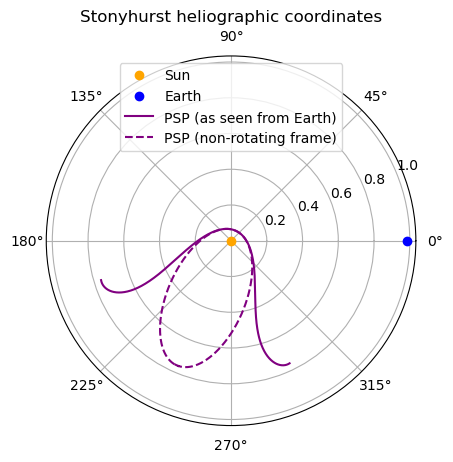

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.plot(0, 0, 'o', label='Sun', color='orange')
ax.plot(*coord_to_polar(earth), 'o', label='Earth', color='blue')
ax.plot(*coord_to_polar(psp),
        label='PSP (as seen from Earth)', color='purple')
ax.plot(*coord_to_polar(psp.transform_to(earth)),
        label='PSP (non-rotating frame)', color='purple', linestyle='dashed')
ax.set_title('Stonyhurst heliographic coordinates')
ax.legend(loc='upper center')

plt.show()